In [65]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [66]:
ar_df = pd.read_csv('csv/air_reserve.csv')
asi_df = pd.read_csv('csv/air_store_info.csv')
avd_df = pd.read_csv('csv/air_visit_data.csv')
hr_df = pd.read_csv('csv/hpg_reserve.csv')
hsi_df = pd.read_csv('csv/hpg_store_info.csv')
sir_df = pd.read_csv('csv/store_id_relation.csv')
sample_df = pd.read_csv('csv/sample_submission.csv')
di_df = pd.read_csv('csv/date_info.csv')

In [67]:
ar_df.head()
ar_df.shape

(92378, 4)

In [68]:
asi_df.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [69]:
avd_df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [70]:
hr_df.head()
hr_df.shape

(2000320, 4)

In [71]:
hsi_df.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [72]:
sir_df.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [73]:
sample_df.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,25
1,air_00a91d42b08b08d9_2017-04-24,25
2,air_00a91d42b08b08d9_2017-04-25,25
3,air_00a91d42b08b08d9_2017-04-26,25
4,air_00a91d42b08b08d9_2017-04-27,25


In [74]:
di_df.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


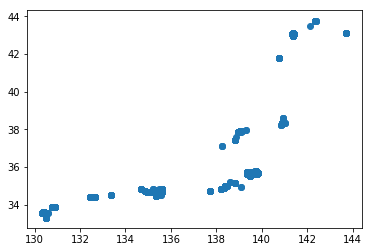

In [75]:
# longitude-latitude cluster
xh = hsi_df['longitude']
yh = hsi_df['latitude']
plt.scatter(xh,yh)
plt.show()

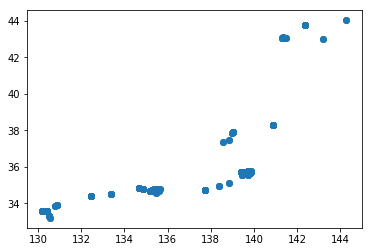

In [76]:
xa = asi_df['longitude']
ya = asi_df['latitude']
plt.scatter(xa,ya)
plt.show()

In [77]:
# location counting
asi_location_df = pd.DataFrame(asi_df.air_area_name.str.split(' ', 2).tolist(), columns = ['province','city', 'street'])
asi_df = asi_df.join(asi_location_df)
asi_df.drop(['air_area_name'], axis=1, inplace=True)

In [78]:
hpg_location_df = pd.DataFrame(hsi_df.hpg_area_name.str.split(' ', 2).tolist(), columns = ['province','city', 'street'])
hsi_df = hsi_df.join(hpg_location_df)
hsi_df.drop(['hpg_area_name'], axis=1, inplace=True)

In [79]:
province_count = pd.concat([asi_df['province'], hsi_df['province']]).value_counts().size # 13
city_count = pd.concat([asi_df['city'], hsi_df['city']]).value_counts().size # 85
street_count = pd.concat([asi_df['street'], hsi_df['street']]).value_counts().size # 191
location_total = province_count + city_count + street_count # 289
print('location_total:', location_total)

location_total: 289


In [80]:
# merge air_store_info & hpg_store_info dataset
link_df = pd.merge(asi_df, sir_df, on='air_store_id', how='outer')
rrvf_df = pd.merge(link_df, hsi_df, on='hpg_store_id', how='outer')
rrvf_df = rrvf_df.fillna(0)

In [81]:
# process latitude & longitude overlapping
count_latitude_x = (rrvf_df['latitude_x'] > 0) + 0
count_latitude_y = (rrvf_df['latitude_y'] > 0) + 0
count_latitude = count_latitude_x + count_latitude_y
mean_latitude = (rrvf_df['latitude_x'] + rrvf_df['latitude_y']) / count_latitude

count_longitude_x = (rrvf_df['longitude_x'] > 0) + 0
count_longitude_y = (rrvf_df['longitude_y'] > 0) + 0
count_longitude = count_longitude_x + count_longitude_y
mean_longitude = (rrvf_df['longitude_x'] + rrvf_df['longitude_y']) / count_longitude

rrvf_df.drop(['latitude_x', 'latitude_y', 'longitude_x', 'longitude_y'], axis=1, inplace=True)

In [82]:
ll_df = pd.DataFrame({'latitude': mean_latitude, 'longitude': mean_longitude})
rrvf_df = rrvf_df.join(ll_df)

In [83]:
# counting continuous holiday duration
record_arr = [['2016-01-01', 0]]
record_posi = 0
recording = True
for index, row in di_df.iterrows():
    if recording and row['holiday_flg'] is 1:
        record_arr[record_posi][1] += 1
    elif not recording and row['holiday_flg'] is 1:
        record_posi += 1
        record_arr.append([row['calendar_date'], 1])
        recording = True
    elif recording and row['holiday_flg'] is not 1:
        recording = False
    else:
        pass
record_arr 

[['2016-01-01', 3],
 ['2016-01-11', 1],
 ['2016-02-11', 1],
 ['2016-03-20', 2],
 ['2016-04-29', 1],
 ['2016-05-03', 3],
 ['2016-07-18', 1],
 ['2016-08-11', 1],
 ['2016-08-13', 3],
 ['2016-09-19', 1],
 ['2016-09-22', 1],
 ['2016-10-10', 1],
 ['2016-11-03', 1],
 ['2016-11-23', 1],
 ['2016-12-23', 1],
 ['2016-12-29', 6],
 ['2017-01-09', 1],
 ['2017-02-11', 1],
 ['2017-03-20', 1],
 ['2017-04-29', 1],
 ['2017-05-03', 3]]

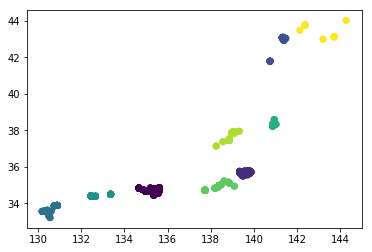

In [84]:
# cluster
X = rrvf_df[['latitude', 'longitude']].values
kmeans = KMeans(n_clusters=9, random_state=42)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 1], X[:, 0], c=y_pred)
plt.show()

In [85]:
# constrcut hpg-air genre map
genre = rrvf_df[['air_genre_name', 'hpg_genre_name']]
union_genre = genre[genre['air_genre_name'] != 0][genre['hpg_genre_name'] != 0]
group_genre = union_genre.groupby(['hpg_genre_name','air_genre_name']).size()
genre_map = []
for hpg_genre in group_genre.index.levels[0]:
    target_air_genre = group_genre[hpg_genre].argmax()
    if hpg_genre == 'Italian':
        target_air_genre = 'Italian/French'
    genre_map.append([hpg_genre, target_air_genre])
genre_map = np.array(genre_map)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  import sys


In [86]:
# process genre
genre = []
for index, row in rrvf_df.iterrows():
    air_genre = row['air_genre_name']
    hpg_genre = row['hpg_genre_name']
    if air_genre != 0:
        genre.append(air_genre)
    elif air_genre == 0 and hpg_genre != 0:
        target_posi = np.argwhere(genre_map == hpg_genre)
        if target_posi.size != 0:
            genre_name = genre_map[target_posi[0][0], 1]
            genre.append(genre_name)
        else:
            genre.append(hpg_genre)
    else:
        pass

In [38]:
genre_df = pd.DataFrame(genre, columns=['genre'])
rrvf_df = rrvf_df.join(genre_df)
rrvf_df.drop(['air_genre_name', 'hpg_genre_name'], axis=1, inplace=True)
rrvf_df.head()

ValueError: columns overlap but no suffix specified: Index(['genre'], dtype='object')

In [39]:
# process area_name
area_name = []
for index, row in rrvf_df.iterrows():
    air_area_name = row['air_area_name']
    hpg_area_name = row['hpg_area_name']
    if air_area_name != 0:
        area_name.append(air_area_name)
    elif air_area_name == 0 and hpg_area_name != 0:
        area_name.append(hpg_area_name)
    else:
        print('?????????????????????')

KeyError: 'air_area_name'

In [37]:
area_name_df = pd.DataFrame(area_name, columns=['area_name'])
rrvf_df = rrvf_df.join(area_name_df)
rrvf_df.drop(['air_area_name', 'hpg_area_name'], axis=1, inplace=True)
rrvf_df.head()

ValueError: labels ['air_area_name' 'hpg_area_name'] not contained in axis